# 실전! 퀀트 스크리닝

## **1. 퀀트 스크리닝(Quant screening)**

> 내가 세운 퀀트 전략을 구현하기 위해, 조건에 맞는 stock들을 선별하는 과정

##**2. Boot camp 3일차 내용 상기!**

> 어제 판다스에 대한 전반적인 이해와 데이터 불러오는 방법, 내 입맛에 맞게 데이터 프레임 가공하는 방법, 마지막으로 조건에 만족하는 애들만 뽑아내는 방법들을 배웠습니다!

> 앞서 배운 것들 만으로도 종목 스크리닝은 충분히 가능합니다. 좀 더 화이팅 해보아요 :)


## **3. 전략 예제**
> 성우의 **"ROE(자기자본이익률)의 모순을 이용한 전략"**을 예제로 진행해 보겠습니다

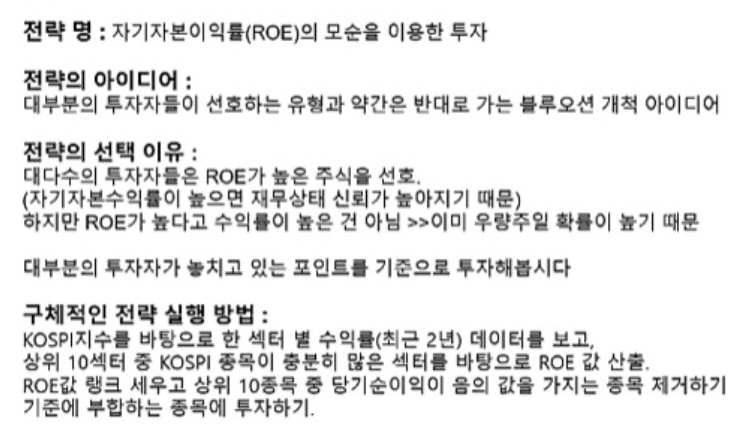

> 연습이니 간단하게 가봅시다!
*  <u>조건1) 직전 분기 당기순이익 (-) 는 제외<u/>
-> 당기순이익 > 0 인 애들
*  <u>조건2) ROE(%)가  낮은 애들<u/>
-> ROE rank() 

##**그럼 이제 시작해 봅시다!**

In [ ]:
# 3일차 교육자료: [pandas란?]
# import (불러오고 싶은 라이브러리) as (별명)
 
import pandas as pd
import numpy as np

In [ ]:
roe = pd.read_excel('/content/ROE(영업이익).xlsx',index_col=0)
dang = pd.read_excel('/content/당기순이익.xlsx',index_col=0)


#3일차 교육자료: [Data 가져오기]
# 외부데이터 불러오기: pd.read_excel( '파일경로/ 파일이름.xlsx ' )
# (csv)는 .csv 주의!!!
# 파일경로 찾는방법
# 절대경로: 불러올 파일- 속성 -주소 그대로 있음!! ctrl c+v
# 상대경로: import os -> os.getcwd()

In [ ]:
roe

,A005930,A000660,A051910,A035420,A005380,A207940,A006400,A035720,A068270,A000270,A012330,A005490,A066570,A051900,A028260,A096770,A105560,A017670,A036570,A034730,A055550,A003550,A032830,A015760,A018260,A009150,A090430,A086790,A003670,A033780,A251270,A011170,A010950,A003490,A018880,A000810,A326030,A009830,A009540,A034220,...,A007630,A010770,A002820,A024070,A051630,A109070,A012600,A006880,A025530,A018470,A072130,A002690,A033250,A071090,A003680,A005820,A000760,A069640,A009810,A009140,A011420,A010420,A030720,A011230,A014910,A005030,A071950,A084870,A011300,A010640,A015260,A001420,A001210,A003280,A001770,A002420,A004920,A010580,A025890,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-01,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.78,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.78,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.78,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.78,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-11.78,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-28,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN,NaN,-1.46,0.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.23,NaN,NaN,NaN,NaN,NaN,1.78,NaN,9.19,NaN,NaN,-2.35,NaN,NaN,NaN,NaN,8.38,NaN,-2.01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-29,13.36,10.04,NaN,16.47,3.14,6.54,5.16,NaN,NaN,7.02,5.57,5.03,18.81,26.87,2.87,NaN,11.19,NaN,NaN,NaN,11.17,8.54,NaN,5.86,12.83,14.62,3.19,NaN,5.94,16.61,NaN,NaN,-18.05,NaN,NaN,NaN,-130.86,NaN,NaN,-0.23,...,NaN,NaN

In [ ]:
dang

,A005930,A000660,A051910,A035420,A005380,A207940,A006400,A035720,A068270,A000270,A012330,A005490,A051900,A066570,A028260,A096770,A105560,A036570,A017670,A055550,A034730,A032830,A003550,A015760,A018260,A009150,A090430,A086790,A003670,A033780,A011170,A251270,A010950,A003490,A000810,A018880,A326030,A009540,A009830,A034220,...,A007630,A010770,A109070,A018500,A024070,A012600,A006880,A025530,A051630,A018470,A072130,A002690,A033250,A071090,A005820,A003680,A000760,A069640,A009140,A009810,A011420,A010420,A030720,A011230,A014910,A005030,A071950,A011300,A084870,A010640,A015260,A001420,A003280,A001210,A001770,A002420,A004920,A010580,A025890,A008500
Symbol,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-02-01,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011e+08,2063790000,1.160651e+09,NaN,3502281000,NaN,NaN,3498076000,NaN,NaN,NaN,NaN,4.529090e+08,6.238112e+08,NaN,NaN,29747509.15,NaN,NaN,NaN,-796108000,NaN,NaN,NaN,-2.474136e+08,NaN,NaN,-70636000,...,NaN,NaN,NaN,16351427.46,-1001070.22,NaN,NaN,NaN,826101.52,NaN,NaN,NaN,-4009542.74,-1259003.29,NaN,NaN,NaN,NaN,1350532.79,NaN,NaN,NaN,NaN,NaN,-956728.05,NaN,NaN,NaN,NaN,1612417.17,NaN,-26831.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-02,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011e+08,2063790000,1.160651e+09,NaN,3502281000,NaN,NaN,3498076000,NaN,NaN,NaN,NaN,4.529090e+08,6.238112e+08,NaN,NaN,29747509.15,NaN,NaN,NaN,-796108000,NaN,NaN,NaN,-2.474136e+08,NaN,NaN,-70636000,...,NaN,NaN,NaN,16351427.46,-1001070.22,NaN,NaN,NaN,826101.52,NaN,NaN,NaN,-4009542.74,-1259003.29,NaN,NaN,NaN,NaN,1350532.79,NaN,NaN,NaN,NaN,NaN,-956728.05,NaN,NaN,NaN,NaN,1612417.17,NaN,-26831.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-03,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011e+08,2063790000,1.160651e+09,NaN,3502281000,NaN,NaN,3498076000,NaN,NaN,NaN,NaN,4.529090e+08,6.238112e+08,NaN,NaN,29747509.15,NaN,NaN,NaN,-796108000,NaN,NaN,NaN,-2.474136e+08,NaN,NaN,-70636000,...,NaN,NaN,NaN,16351427.46,-1001070.22,NaN,NaN,NaN,826101.52,NaN,NaN,NaN,-4009542.74,-1259003.29,NaN,NaN,NaN,NaN,1350532.79,NaN,NaN,NaN,NaN,NaN,-956728.05,NaN,NaN,NaN,NaN,1612417.17,NaN,-26831.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-04,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011e+08,2063790000,1.160651e+09,NaN,3502281000,NaN,NaN,3498076000,NaN,NaN,NaN,NaN,4.529090e+08,6.238112e+08,NaN,NaN,29747509.15,NaN,NaN,NaN,-796108000,NaN,NaN,NaN,-2.474136e+08,NaN,NaN,-70636000,...,NaN,NaN,NaN,16351427.46,-1001070.22,NaN,NaN,NaN,826101.52,NaN,NaN,NaN,-4009542.74,-1259003.29,NaN,NaN,NaN,NaN,1350532.79,NaN,NaN,NaN,NaN,NaN,-956728.05,NaN,NaN,NaN,NaN,1612417.17,NaN,-26831.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-05,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011e+08,2063790000,1.160651e+09,NaN,3502281000,NaN,NaN,3498076000,NaN,NaN,NaN,NaN,4.529090e+08,6.238112e+08,NaN,NaN,29747509.15,NaN,NaN,NaN,-796108000,NaN,NaN,NaN,-2.474136e+08,NaN,NaN,-70636000,...,NaN,NaN,NaN,16351427.46,-1001070.22,NaN,NaN,NaN,826101.52,NaN,NaN,NaN,-4009542.74,-1259003.29,NaN,NaN,NaN,NaN,1350532.79,NaN,NaN,NaN,NaN,NaN,-956728.05,NaN,NaN,NaN,NaN,1612417.17,NaN,-26831.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,26407832000,4758914000,NaN,8.449970e+08,1924553000,2.409748e+08,6.309663e+08,NaN,NaN,1487585000,1526850000,1.788152e+09,8.131011

In [ ]:
#"2020-12-31" 을 기준으로 스크리닝한다 가정해봅시다!
#3일차 교육자료: [Dataframe 가공하기]- [원하는 row만 선택하기]

roe_12_31=roe.iloc[-1]
roe_12_31

A005930    13.36
A000660    10.04
A051910      NaN
A035420    16.47
A005380     3.14
           ...  
A002420      NaN
A004920      NaN
A010580      NaN
A025890      NaN
A008500      NaN
Name: 2020-12-31 00:00:00, Length: 780, dtype: float64

In [ ]:
dang_12_31=dang.iloc[-1]
dang_12_31

A005930    2.640783e+10
A000660    4.758914e+09
A051910             NaN
A035420    8.449970e+08
A005380    1.924553e+09
               ...     
A002420             NaN
A004920             NaN
A010580             NaN
A025890             NaN
A008500             NaN
Name: 2020-12-31 00:00:00, Length: 780, dtype: float64

In [ ]:
screen_df=pd.DataFrame(index=roe_12_31.index)
screen_df

#3일차 교육자료: [Data 가져오기]- [DataFrame 만들기]
#pd. DataFrame( index=  roe_12_31 데이터프레임의 인덱스를 그대로 쓸게요 )

""
A005930
A000660
A051910
A035420
A005380
...
A002420
A004920
A010580
A025890


In [ ]:
screen_df['roe'] = roe_12_31
screen_df['dang'] = dang_12_31
screen_df

#3일차 교육자료: [DataFrame 가공하기]- [새로운 column 추가하기]

,roe,dang
A005930,13.36,2.640783e+10
A000660,10.04,4.758914e+09
A051910,NaN,NaN
A035420,16.47,8.449970e+08
A005380,3.14,1.924553e+09
...,...,...
A002420,NaN,NaN
A004920,NaN,NaN
A010580,NaN,NaN
A025890,NaN,NaN


In [ ]:
screen_df. dropna( axis=0 )

#3일차 교육자료: [DataFrame 가공하기]- [결측치 날려버리기기]

,roe,dang
A005930,13.36,2.640783e+10
A000660,10.04,4.758914e+09
A035420,16.47,8.449970e+08
A005380,3.14,1.924553e+09
A207940,6.54,2.409748e+08
...,...,...
A071090,0.23,-1.259003e+06
A009140,1.78,1.350533e+06
A014910,-2.35,-9.567281e+05
A010640,8.38,1.612417e+06


In [ ]:
screen_df['dang'] >0

#3일차 교육자료: [Data 필터링하기]

A005930     True
A000660     True
A051910    False
A035420     True
A005380     True
           ...  
A002420    False
A004920    False
A010580    False
A025890    False
A008500    False
Name: dang, Length: 780, dtype: bool

In [ ]:
screen_df = screen_df [screen_df['dang']>0]
screen_df

#3일차 교육자료: [Data 필터링하기]

,roe,dang
A005930,13.36,2.640783e+10
A000660,10.04,4.758914e+09
A035420,16.47,8.449970e+08
A005380,3.14,1.924553e+09
A207940,6.54,2.409748e+08
...,...,...
A014440,3.00,2.658898e+06
A003780,18.68,5.136549e+06
A051630,0.72,8.261015e+05
A009140,1.78,1.350533e+06


In [ ]:
screen_df['roe_rank'] = screen_df['roe'].rank()
screen_df

# 3일차 교육자료: [Data 필터링하기]-[rank 매기기]
# roe 낮은 애들을 추출하기 위해, 오름차순으로 정렬해보겠습니다! 

,roe,dang,roe_rank
A005930,13.36,2.640783e+10,62.0
A000660,10.04,4.758914e+09,51.0
A035420,16.47,8.449970e+08,70.0
A005380,3.14,1.924553e+09,17.0
A207940,6.54,2.409748e+08,31.0
...,...,...,...
A014440,3.00,2.658898e+06,16.0
A003780,18.68,5.136549e+06,71.0
A051630,0.72,8.261015e+05,4.0
A009140,1.78,1.350533e+06,7.0


In [ ]:
screen_df= screen_df.sort_values( by='roe_rank' )
screen_df

,roe,dang,roe_rank
A002870,-12.26,3.292270e+07,1.0
A002760,0.33,3.945085e+05,2.0
A004890,0.56,8.015170e+06,3.0
A051630,0.72,8.261015e+05,4.0
A105840,0.77,3.389817e+07,5.0
...,...,...,...
A028050,24.34,2.444510e+08,77.0
A051900,26.87,8.131011e+08,78.0
A011070,29.40,2.361279e+08,79.0
A298020,41.06,1.682721e+08,80.0


In [ ]:
# 상위 20 종목들만 가져오기
# ':' = '~' 라는 의미!! 

screen_df[:20]

,roe,dang,roe_rank
A002760,0.90,3.945085e+05,1.0
A003570,1.37,8.341660e+06,2.0
A194370,1.51,2.319865e+06,3.0
A298050,1.73,6.810289e+06,4.5
A088350,1.73,2.412112e+08,4.5
A000050,1.76,1.302570e+07,6.0
A014440,1.81,2.658898e+06,7.0
A000520,2.13,1.340564e+06,8.0
A004890,2.24,8.015170e+06,9.0
A000390,2.26,6.482791e+06,10.0


In [ ]:
#이 종목 ticker 들을 따로 내보냅시다!

screen_df[:20].index.tolist()

['A002760',
 'A003570',
 'A194370',
 'A298050',
 'A088350',
 'A000050',
 'A014440',
 'A000520',
 'A004890',
 'A000390',
 'A005680',
 'A009140',
 'A005380',
 'A003670',
 'A000370',
 'A051630',
 'A058430',
 'A011150',
 'A006980',
 'A006220']

### **-수고하셨습니다. 이로 4일간의 Bootcamp 일정이 끝났습니다. 모두 화이팅-**